In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from datetime import datetime

In [ ]:
# Load the dataset
df = pd.read_csv("/content/annual_gold_rate.csv")

# Display the first few rows to ensure the data is loaded correctly
df.head()


,Date,USD,EUR,GBP,INR,AED,CNY
0,1980-12-31,614.50,378.19461,263.80259,4831.74943,2278.36795,NaN
1,1981-12-31,459.26,360.90588,227.01948,3966.64790,1691.03194,NaN
2,1982-12-31,375.30,345.59742,215.53232,3553.62680,1378.72895,NaN
3,1983-12-30,423.66,439.89318,279.24936,4270.42821,1557.45790,NaN
4,1984-12-31,360.78,425.91000,269.81553,4067.60433,1324.72272,NaN


In [ ]:
# Split the Date into separate columns for day, month, year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
# Features (Day, Month, Year, and exchange rates) and Target (Gold Price in INR)
X = df[['Day', 'Month', 'Year', 'USD', 'EUR', 'GBP', 'AED', 'CNY']]
y = df['INR']  # Target variable (Gold Price in INR)

# Handle missing values by imputing them with the median value
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
print(X.head(5))

    Day  Month    Year     USD        EUR        GBP         AED          CNY
0  31.0   12.0  1980.0  614.50  378.19461  263.80259  2278.36795  3346.427445
1  31.0   12.0  1981.0  459.26  360.90588  227.01948  1691.03194  3346.427445
2  31.0   12.0  1982.0  375.30  345.59742  215.53232  1378.72895  3346.427445
3  30.0   12.0  1983.0  423.66  439.89318  279.24936  1557.45790  3346.427445
4  31.0   12.0  1984.0  360.78  425.91000  269.81553  1324.72272  3346.427445


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline: scaling
numeric_features = ['Day', 'Month', 'Year', 'USD', 'EUR', 'GBP', 'AED', 'CNY']
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Creating a pipeline with preprocessor and model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



Mean Absolute Error (MAE): 5296.21
Mean Squared Error (MSE): 41398641.47
Root Mean Squared Error (RMSE): 6434.18
R² Score: 0.97


In [ ]:
# Define function to predict gold price based on the date
def predict_gold_price(date, usd, eur, gbp, aed, cny):
    # Convert date to datetime format
    date = pd.to_datetime(date)

    # Extract day, month, and year from the date
    day = date.day
    month = date.month
    year = date.year

    # Prepare input data
    input_data = pd.DataFrame({
        'Day': [day],
        'Month': [month],
        'Year': [year],
        'USD': [usd],
        'EUR': [eur],
        'GBP': [gbp],
        'AED': [aed],
        'CNY': [cny]
    })

    # Predict gold price in INR
    predicted_price = model.predict(input_data)

    return predicted_price[0]

# User input
date_input = input("Enter the date (YYYY-MM-DD): ")
usd_input = float(input("Enter the USD exchange rate: "))
eur_input = float(input("Enter the EUR exchange rate: "))
gbp_input = float(input("Enter the GBP exchange rate: "))
aed_input = float(input("Enter the AED exchange rate: "))
cny_input = float(input("Enter the CNY exchange rate: "))

# Predict and display the gold price
predicted_price = predict_gold_price(date_input, usd_input, eur_input, gbp_input, aed_input, cny_input)

print(f"The predicted gold price in INR for {date_input} is: ₹{predicted_price:.2f}")


Enter the date (YYYY-MM-DD): 2020-12-31
Enter the USD exchange rate: 1769.59
Enter the EUR exchange rate: 1549.04
Enter the GBP exchange rate: 1379.05
Enter the AED exchange rate: 6499.7
Enter the CNY exchange rate: 12199.77
The predicted gold price in INR for 2020-12-31 is: ₹130310.76


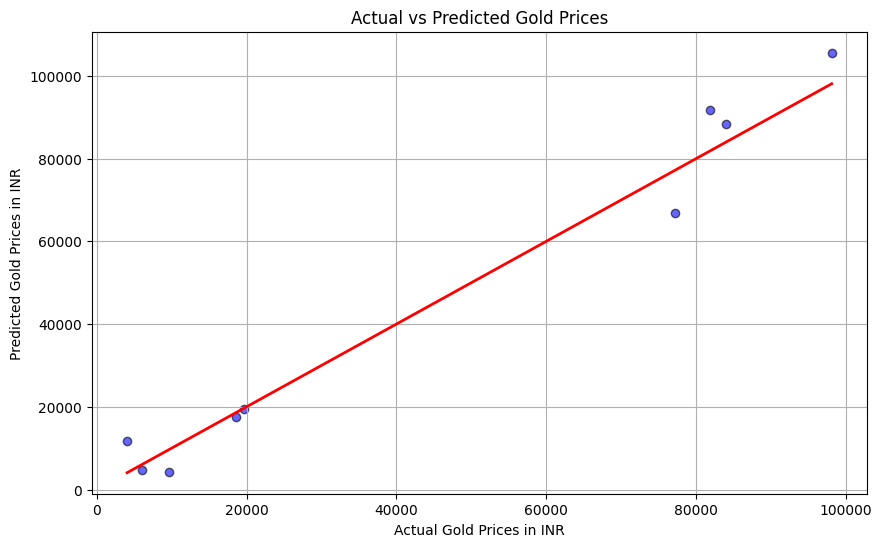

In [ ]:

# Plotting Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Gold Prices in INR')
plt.ylabel('Predicted Gold Prices in INR')
plt.title('Actual vs Predicted Gold Prices')
plt.grid(True)
plt.show()

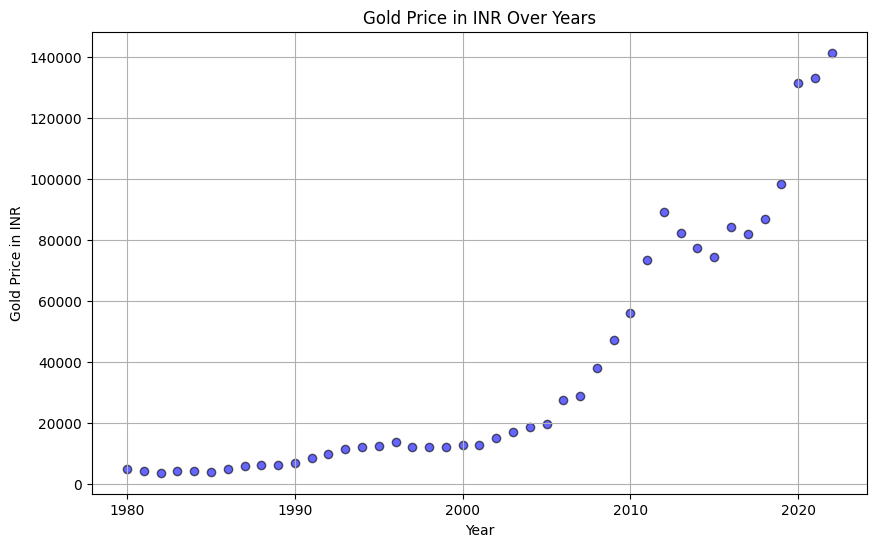

In [ ]:
# Scatter plot: Year vs Gold Price in INR
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['INR'], color='blue', edgecolor='k', alpha=0.6)
plt.xlabel('Year')
plt.ylabel('Gold Price in INR')
plt.title('Gold Price in INR Over Years')
plt.grid(True)
plt.show()
